In [1]:
!pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

class PlotDrawer():
    def __init__(self, root_dir='./plots/'):
        self.root = root_dir
        if not os.path.exists(self.root):
            os.mkdir(self.root)
        elif not os.path.isdir(self.root):
            raise ValueError('Provided path is not a directory')

    def draw_plots(self, URI):
        df = pd.read_json(URI)

        prediction_metrics = pd.DataFrame(columns=['R2', 'MAE', 'MSE'])
        error = mean_absolute_error(df["gt_corners"], df["rb_corners"])
        square_error = mean_squared_error(df["gt_corners"], df["rb_corners"])
        r_squared = r2_score(df["gt_corners"], df["rb_corners"])
        prediction_metrics.loc[0] = [r_squared, error, square_error]
        prediction_metrics.to_excel(self.root + 'prediction_metrics.xlsx')

        deviation_metrics = pd.DataFrame(columns=['Emax', 'MAD', 'MAPD', 'RMSD'])
        mean = self.get_metrics(df['mean'])
        max = self.get_metrics(df['max'])
        min = self.get_metrics(df['min'])
        floor_mean = self.get_metrics(df['floor_mean'])
        floor_max = self.get_metrics(df['floor_max'])
        floor_min = self.get_metrics(df['floor_min'])
        ceiling_mean = self.get_metrics(df['ceiling_mean'])
        ceiling_max = self.get_metrics(df['ceiling_max'])
        ceiling_min = self.get_metrics(df['ceiling_min'])
        deviation_metrics.loc['mean'] = mean
        deviation_metrics.loc['max'] = max
        deviation_metrics.loc['min'] = min
        deviation_metrics.loc['floor_mean'] = floor_mean
        deviation_metrics.loc['floor_max'] = floor_max
        deviation_metrics.loc['floor_min'] = floor_min
        deviation_metrics.loc['ceiling_mean'] = ceiling_mean
        deviation_metrics.loc['ceiling_max'] = ceiling_max
        deviation_metrics.loc['ceiling_min'] = ceiling_min
        deviation_metrics.to_excel(self.root + 'deviation_metrics.xlsx')

        self.histogram_plot(df['mean'], 'Mean deviations of room corners', 'Degrees interval', 'Number of occurences', 'overall_mean.png')
        self.histogram_plot(df['max'], 'Max deviations of room corners', 'Degrees interval', 'Number of occurences', 'overall_max.png')
        self.histogram_plot(df['min'], 'Min deviations of room corners', 'Degrees interval', 'Number of occurences', 'overall_min.png')
        self.histogram_plot(df['floor_mean'], 'Mean floor deviations of room corners', 'Degrees interval', 'Number of occurences', 'floor_mean.png')
        self.histogram_plot(df['floor_max'], 'Max floor deviations of room corners', 'Degrees interval', 'Number of occurences', 'floor_max.png')
        self.histogram_plot(df['floor_min'], 'Min floor deviations of room corners', 'Degrees interval', 'Number of occurences', 'floor_min.png')
        self.histogram_plot(df['ceiling_mean'], 'Mean ceiling deviations of room corners', 'Degrees interval', 'Number of occurences', 'ceiling_mean.png')
        self.histogram_plot(df['ceiling_max'], 'Max ceiling deviations of room corners', 'Degrees interval', 'Number of occurences', 'ceiling_max.png')
        self.histogram_plot(df['ceiling_min'], 'Min ceiling deviations of room corners', 'Degrees interval', 'Number of occurences', 'ceiling_min.png')

        paths = [
            self.root + 'prediction_metrics.xlsx',
            self.root + 'deviation_metrics.xlsx',
            self.root + 'overall_mean.png',
            self.root + 'overall_max.png',
            self.root + 'overall_mix.png',
            self.root + 'floor_mean.png',
            self.root + 'floor_max.png',
            self.root + 'floor_min.png',
            self.root + 'ceiling_mean.png',
            self.root + 'ceiling_max.png',
            self.root + 'ceiling_min.png',
        ]
        return paths

    def get_metrics(self, data):
        metrics = {}
        metrics['Emax'] = self.emax(data, data.mean())
        metrics['MAD'] = self.mad(data, data.mean())
        metrics['MAPD'] = self.mapd(data, data.mean())
        metrics['RMSD'] = self.rmsd(data, data.mean())
        return metrics

    def emax(self, data, m):
        return np.max(np.abs(data - m))

    def mad(self, data, m):
        return np.mean(np.abs(data - m))

    def mapd(self, data, m):
        return np.mean(np.abs((data - m) / data)) * 100

    def rmsd(self, data, m):
        return np.sqrt(np.mean(data - m) ** 2)

    def histogram_plot(self, data, title, xlabel, ylabel, filename):
        plt.figure(figsize=(10, 10))
        data.hist(bins=20)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.savefig(self.root + filename)

['./plots/prediction_metrics.xlsx', './plots/deviation_metrics.xlsx', './plots/overall_mean.png', './plots/overall_max.png', './plots/overall_mix.png', './plots/floor_mean.png', './plots/floor_max.png', './plots/floor_min.png', './plots/ceiling_mean.png', './plots/ceiling_max.png', './plots/ceiling_min.png']


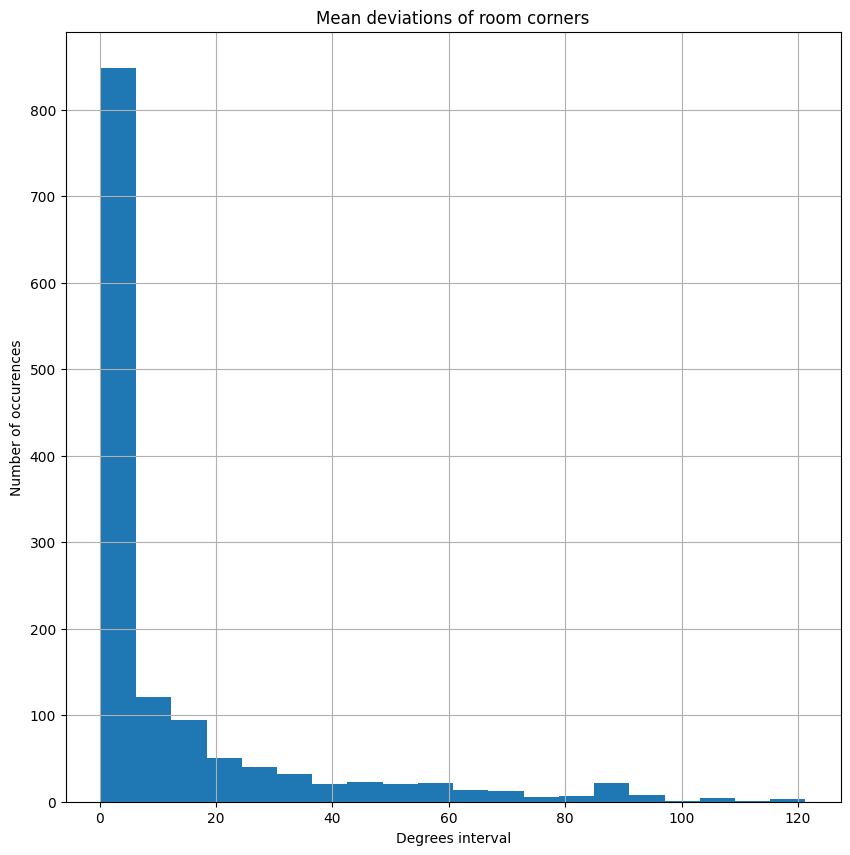

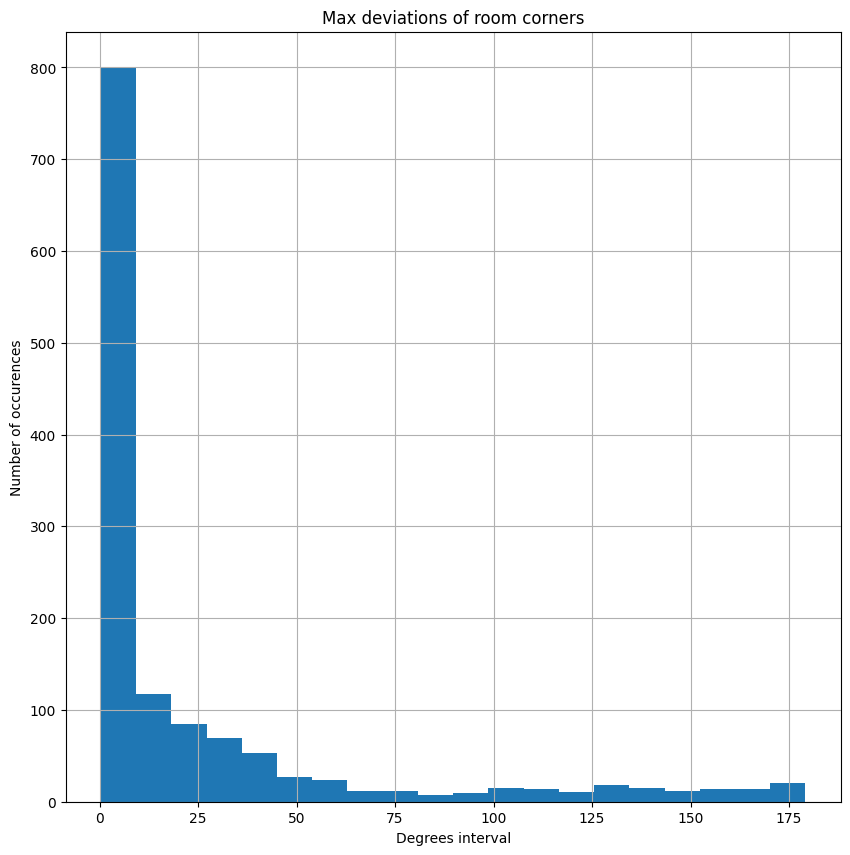

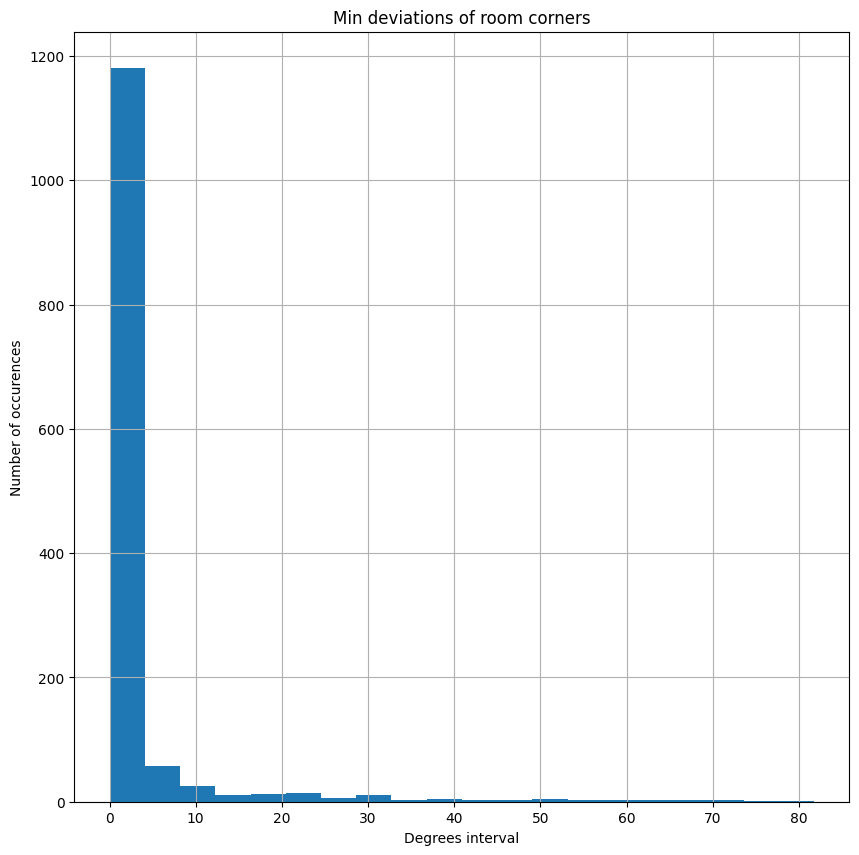

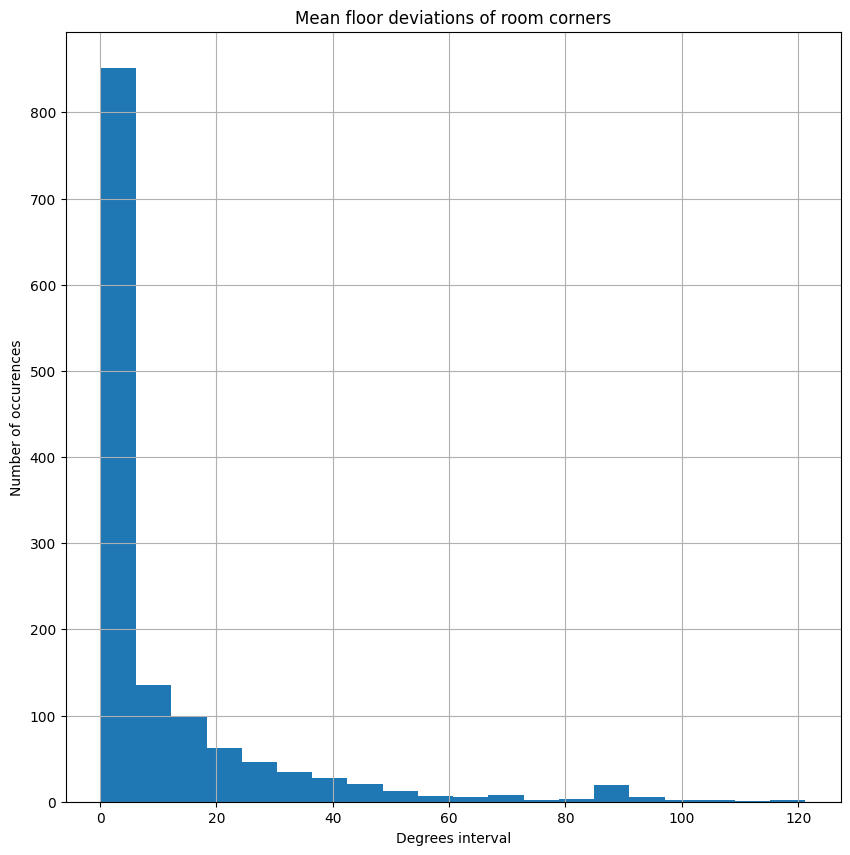

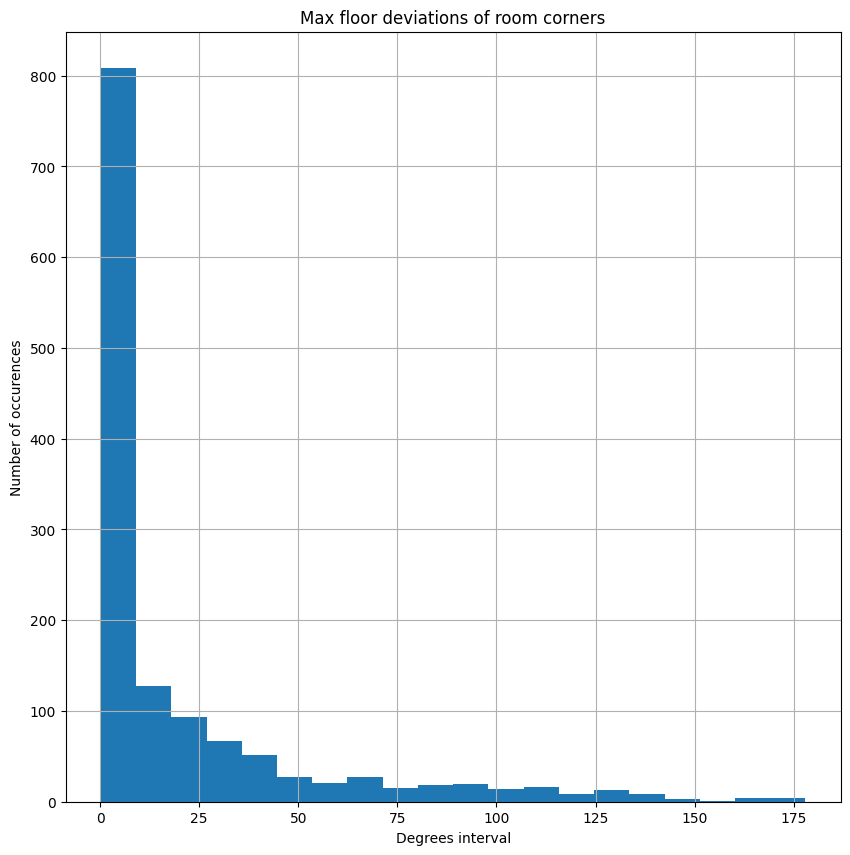

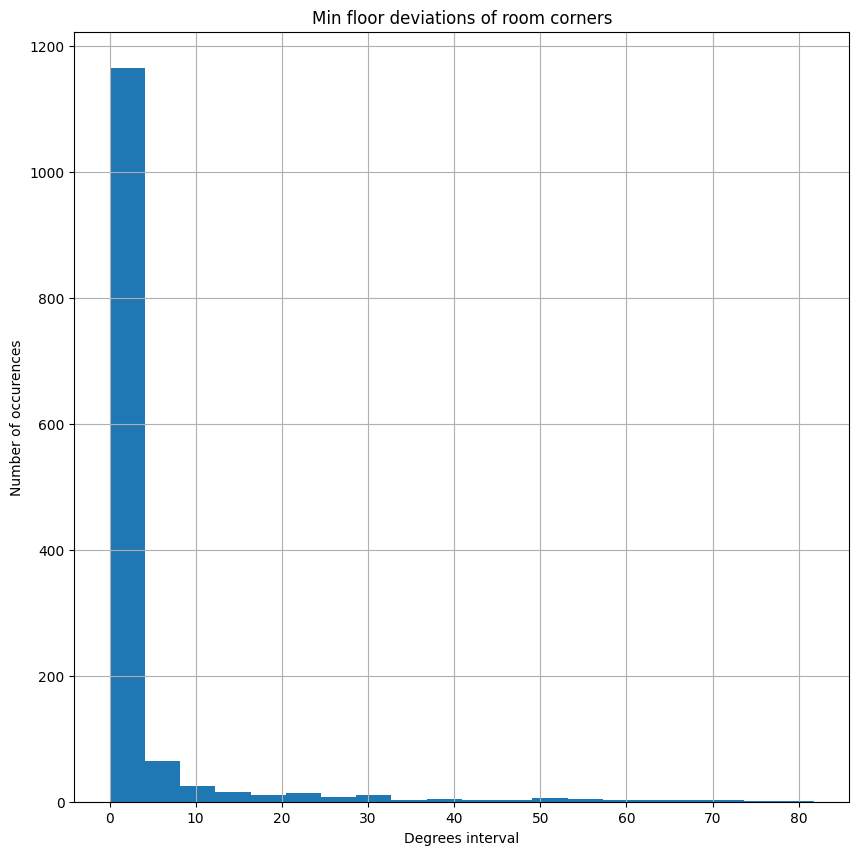

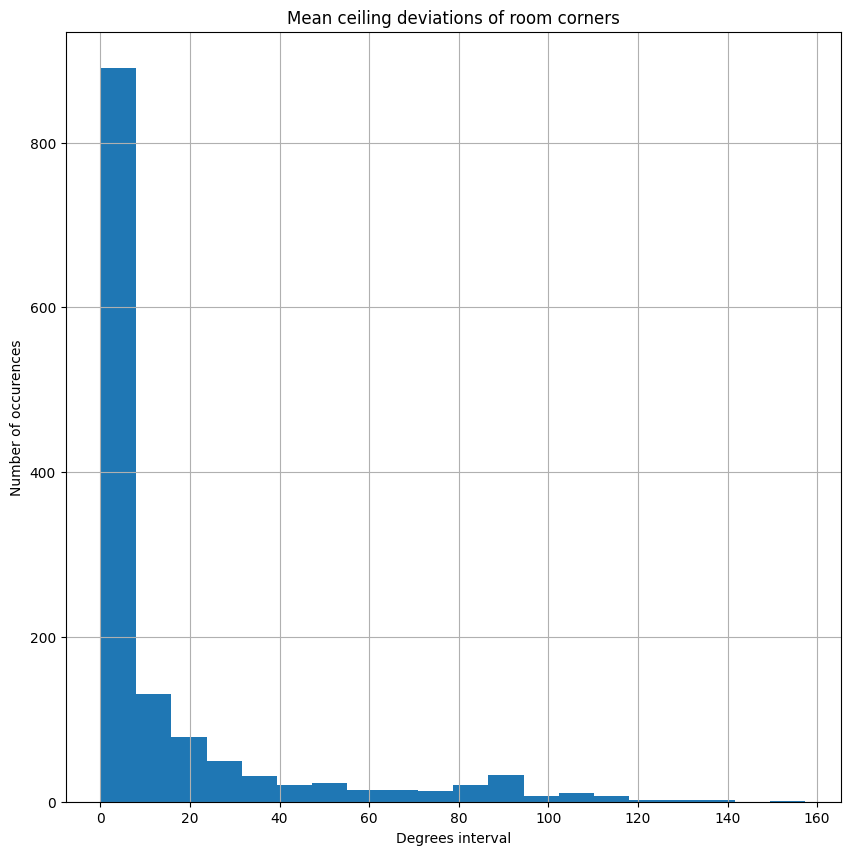

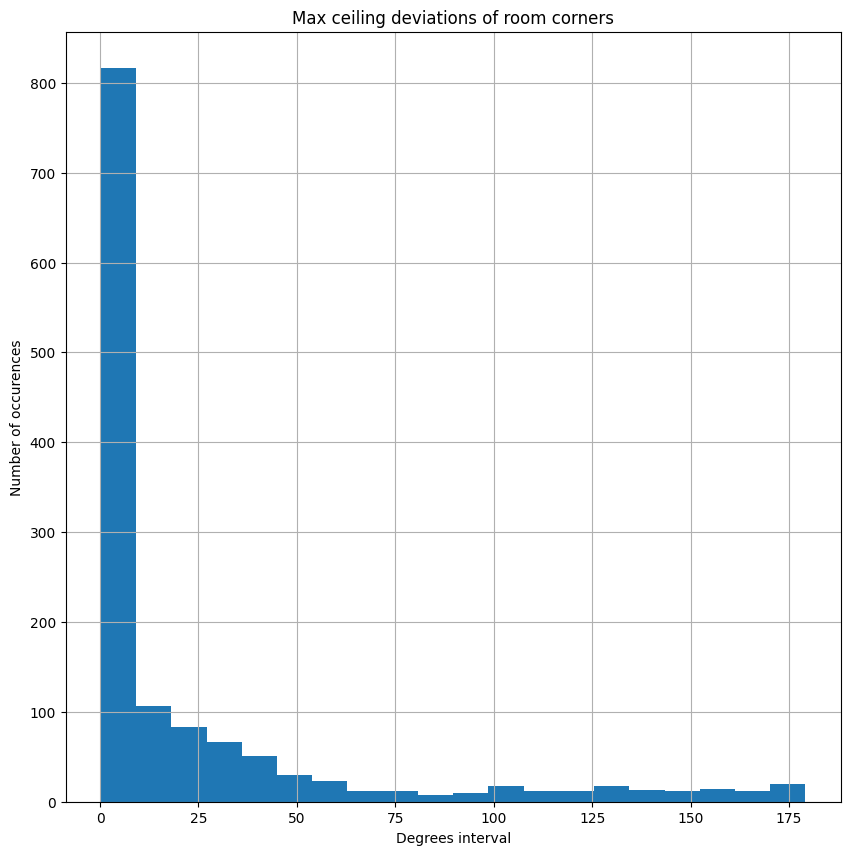

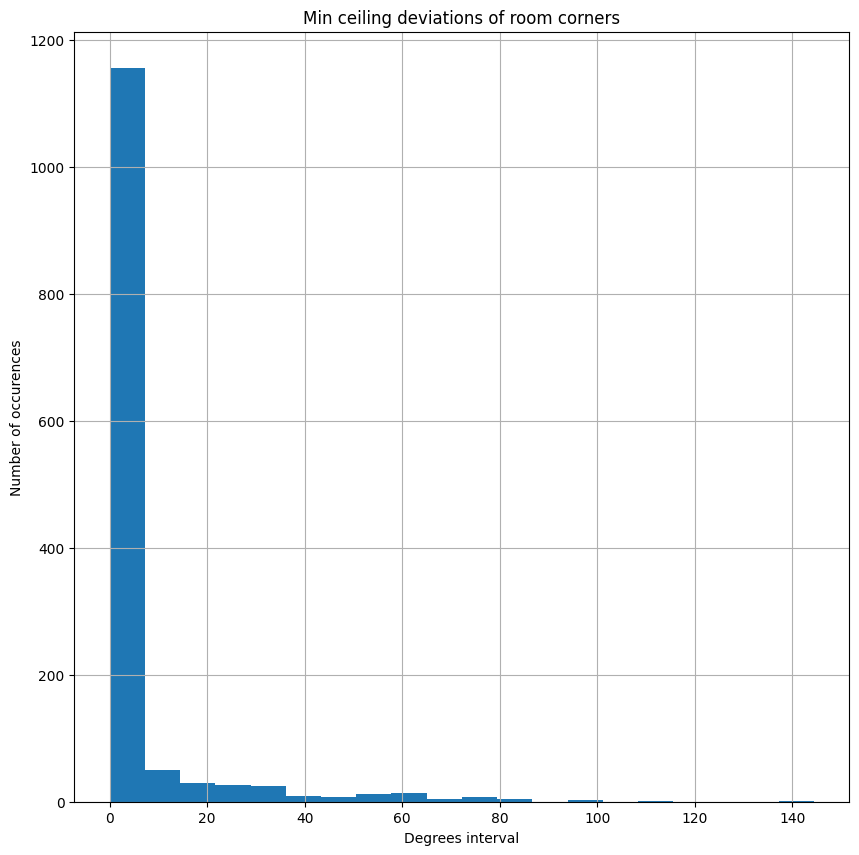

In [4]:
pld = PlotDrawer()
print(pld.draw_plots('https://ai-process-sandy.s3.eu-west-1.amazonaws.com/purge/deviation.json'))

In [3]:
!pip freeze > requirements.txt